In [1]:
# 导入红酒数据集
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [4]:
wine = load_wine()
# 包含 data，target，target_names, feature_names 等属性
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
# 数据包含 13 个特征
wine.data.shape

(178, 13)

In [6]:
wine.target.shape

(178,)

In [7]:
import pandas as pd

pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
# 13 个特征对于的名字
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=42)

In [11]:
X_train.shape

(133, 13)

In [74]:
# 实例化分类树，并进行训练
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.9111111111111111

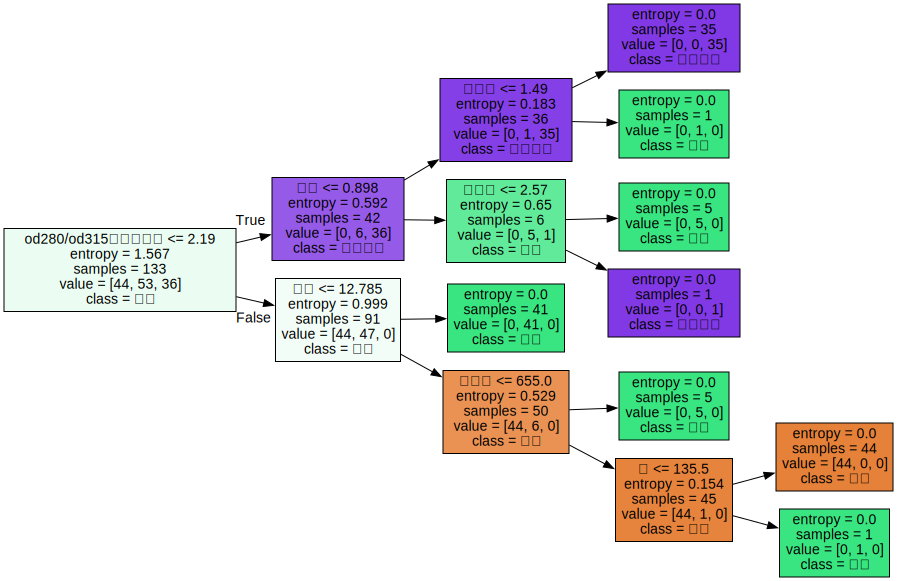

In [75]:
feature_name = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜色强度',
                '色调', 'od280/od315稀释葡萄酒', '脯氨酸']

import graphviz

dot_data = tree.export_graphviz(clf
                                , feature_names=feature_name
                                , class_names=["琴酒", "雪莉", "贝尔摩德"]
                                , filled=True
                                , rotate=True
                                )
graph = graphviz.Source(dot_data)
graph

In [76]:
# 每个特征的权重
clf.feature_importances_

array([0.30925183, 0.01871102, 0.        , 0.        , 0.03319124,
       0.        , 0.03162723, 0.        , 0.        , 0.        ,
       0.06888166, 0.44454697, 0.09379006])

In [77]:
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.3092518262205791),
 ('苹果酸', 0.01871102182150085),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.033191239200508586),
 ('总酚', 0.0),
 ('类黄酮', 0.031627226094415734),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.0),
 ('色调', 0.06888166407139175),
 ('od280/od315稀释葡萄酒', 0.44454696632742136),
 ('脯氨酸', 0.0937900562641826)]

In [87]:
# 指定随机数种子
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)  #返回预测的准确度
score

0.8888888888888888

In [96]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  , random_state=42
                                  , splitter="best") # random 和 best(默认)
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)  #返回预测的准确度
score

0.8888888888888888

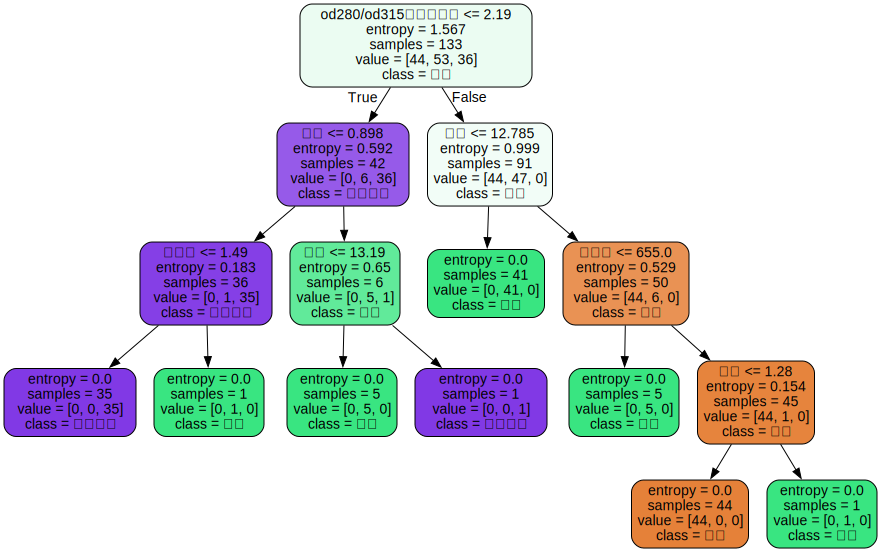

In [98]:
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [100]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(X_train, y_train)
score_train

1.0

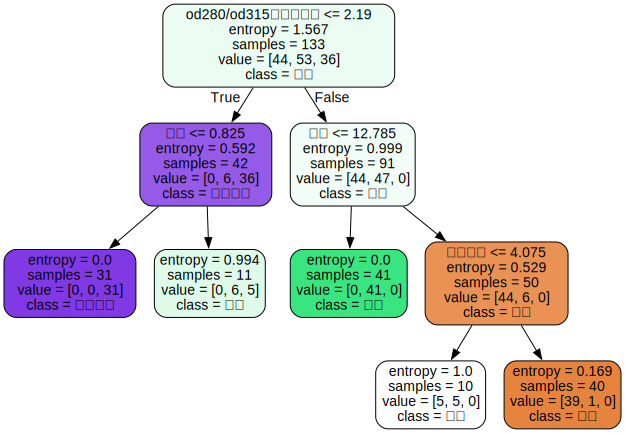

In [101]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  , random_state=42
                                  , splitter="best"
                                  , max_depth= 3
                                  , min_samples_leaf=10
                                  , min_samples_split= 25) # random 和 best(默认)
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [103]:
score = clf.score(X_test, y_test)
score

0.8888888888888888

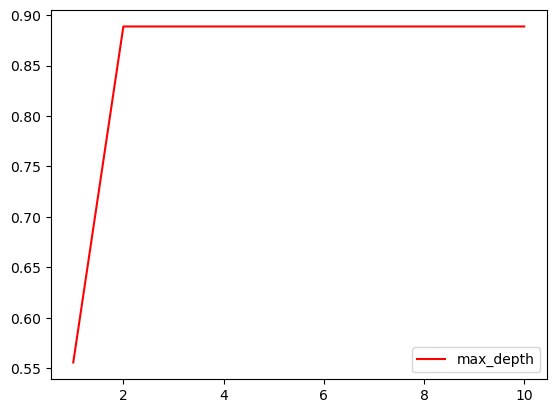

In [106]:
import matplotlib.pyplot as plt
test = []

for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      , criterion="entropy"
                                      , random_state=30
                                      , splitter="best"
                                      )
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    test.append(score)

plt.plot(range(1,11), test,color="red",label="max_depth")
plt.legend()
plt.show()

In [107]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(X_test)

array([13, 13, 11, 13,  9, 13,  9,  3,  9, 13, 13,  4, 13,  3, 13,  9,  9,
        9, 13,  9, 13, 11,  6,  3,  3,  3,  9,  9,  9, 13, 13,  9,  3, 13,
       13, 13,  3,  3,  9,  3, 13,  9,  9,  6,  6], dtype=int64)

In [108]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       1])